$\Huge{\text{Crises cardiaques}}$

Jeu de données de nature médicale, ou la variable à prédire output est 1 dans le cas d’une crise cardiaque, 0 dans le cas d’un individu sain.

### Corrélation
Calculer la corrélation entre la variable age et la variable thalachh (fréquence cardiaque maximale atteinte).

Tracer le scatterplot de ces deux variables et comparer à la valeur de corrélation.
Comment interpréter cette valeur ?


In [2]:
#Import
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from matplotlib import pyplot as plt
from sklearn import svm
import seaborn as sb
import pandas as pd
import numpy as np
#Paramètres Pyplot
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 5)
#Sauvegarder les figures ? (False=Non,True=Oui; Sauvegarde dans un dossier "Projet" à créer au préalable)
SAVE_FIGURE = False

In [3]:
#Load des données sur un google drive (fichier/spreadsheets public et header en première ligne nécessaire)
def load_from_gspreadsheet(sheet_name, key):
    sheet_name = sheet_name.replace(' ', '%20')
    url = f'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'
    print('Loading of google spreadsheet',end=' ')
    df = pd.read_csv(url)
    print('completed')
    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

#Load des données/DataFrame en ligne
#df = load_from_gspreadsheet("heart.csv","1js05Vhfvk73vZg1-1cNikheigzoHP4clL1j_jmp4cPQ")

#Load des données/DataFrame en local
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Corrélation
Calculer la corrélation entre la variable age et la variable thalachh (fréquence cardiaque maximale atteinte).
Tracer le *scatterplot* de ces deux variables et comparer à la valeur de corrélation.
Comment interpréter cette valeur ?

Le *scatterplot* nous montre que les données semble plus ou moins s'aligner selon une droite de coefficient directeur négatif, d'où le coefficient de corrélation négatif qu'on a obtenue, mais cette alignement reste assez vague.

Corrélation : -0.39852193812106734


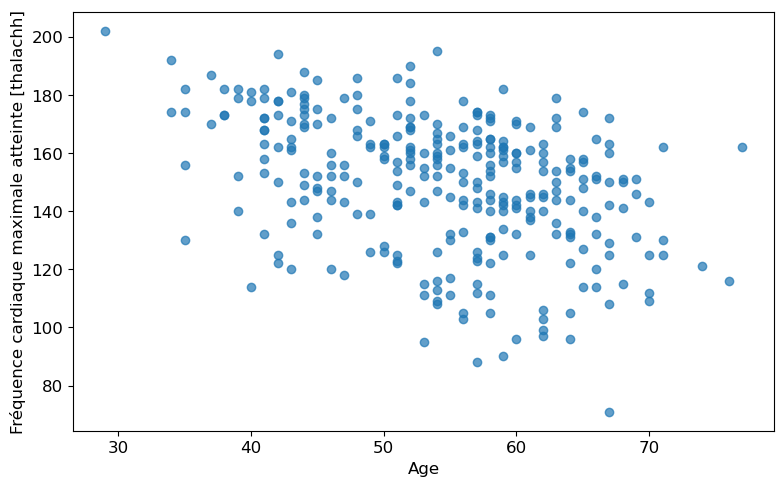

In [4]:
print("Corrélation :",np.corrcoef(df['age'],df['thalachh'])[0,1])

plt.scatter(df['age'],df['thalachh'],alpha=0.7)
#plt.title("Fréquence cardiaque maximale atteinte en fonction de l'age")
plt.xlabel('Age')
plt.ylabel('Fréquence cardiaque maximale atteinte [thalachh]')
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/Corrélation")
plt.show()

### ACP
En excluant la variable output (dont la valeur 0 correspond à un individu sain et la valeur 1 à un individu faisant une crise cardiaque), effectuer une ACP sur les variables restantes.
Tracer les graphes suivants :

#### • Variance expliquée par les 15 premières composantes

#### • Courbe cumulative de la variance expliquée (par toutes les composantes)

Interpréter : a-t-on une bonne représentation ?

On a seulement $33\%$ de variance expliquée par les $2$ premières composantes principales et on a besoin de $7$ composantes principales pour avoir plus de $70\%$ de variance expliquée.
Donc la représentation n'est pas optimale.

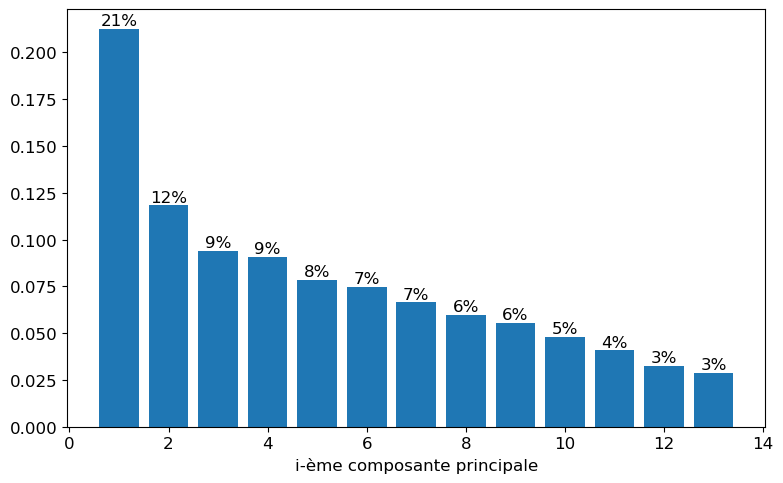

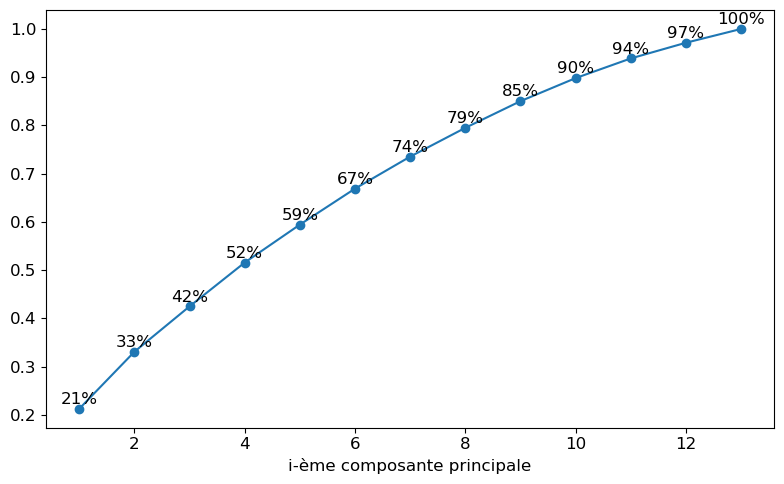

In [5]:
#Séparation Données et Output
data = df.iloc[:, :-1]
output = df.output.values

#Centrage et Réduction des données
data -= data.mean()
data /= data.std()

#ACP
pca = PCA()
pca.fit(data)
n = pca.n_components_

#Plot de la Variance expliquée
plt.bar(range(1,n+1), pca.explained_variance_ratio_[:n])
for i, var in enumerate(pca.explained_variance_ratio_[:n]):
    plt.text(i+1, var + 0.002, f'{var:.0%}', ha='center')
plt.xlabel('i-ème composante principale')
#plt.title(f"Pourcentage de variance expliquée par les {n} premières composantes")
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/Variance")
plt.show()

#Plot Courbe cumulative de la Variance expliquée
plt.plot(range(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_),marker='o')
for i, var in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    plt.text(i+1, var + 0.01, f'{var:.0%}', ha='center')
plt.xlabel('i-ème composante principale')
#plt.title("Courbe cumulative de la variance expliquée (par toutes les composantes)")
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/VarianceCum")
plt.show()

#### • Nuage des individus projétés sur les 2 premières composantes principales, colorés par classe (avec ou sans crise cardiaque)

Interpréter : peut-on obtenir une bonne classification en n’utilisant que ces deux composantes ?

On voit une tendance claire ("Individu Crise Cardiaque" vers les négatifs et les "Individu Sain" vers les positifs sur le premier axe principale) mais on a aussi beaucoup de données qui se superposent.
Donc on aura une classification moyenne en n’utilisant que ces deux composantes.

#### • Même nuage, colorés selon la qualité de la représentation (cos2)

Interpréter : comment lier cela à la variance expliquée ?

On a très peu de valeurs bien représentés car on a seulement $33%$ de variance expliquée sur les $2$ premières composantes principales.

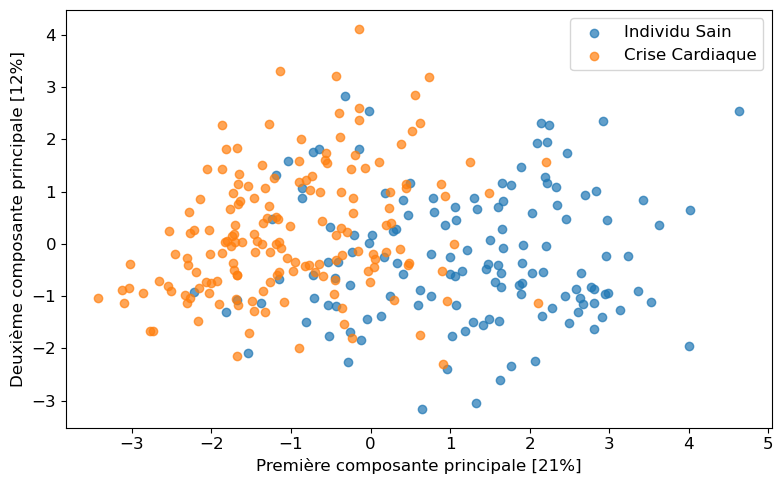

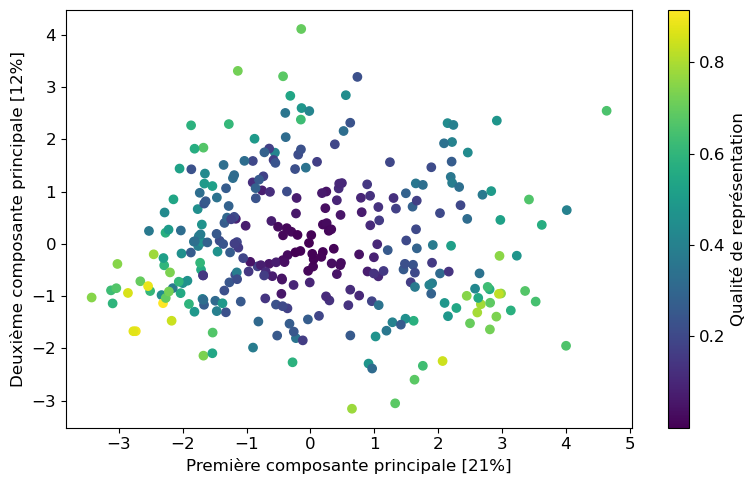

In [6]:
#Transformation des données
cp = pca.transform(data)

#Plot Nuage des individus projétés sur les 2 premières composantes principales
plt.scatter(cp[output == 0, 0], cp[output == 0, 1], alpha=0.7, label = 'Individu Sain')
plt.scatter(cp[output == 1, 0], cp[output == 1, 1], alpha=0.7, label = 'Crise Cardiaque')
plt.legend()
#plt.title("Nuage des individus projetés sur les 2 premières composantes principales")
plt.xlabel(fr'Première composante principale [{pca.explained_variance_ratio_[0]:.0%}]')
plt.ylabel(fr'Deuxième composante principale [{pca.explained_variance_ratio_[1]:.0%}]')
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/Nuage")
plt.show()

#Calcul de cos2 pour tout les axes
cos_sq = cp**2 / np.sum(cp**2, axis = 1)[:, np.newaxis]

#Récupération et somme des cos2 sur les 2 premières composantes principales
cos_sq = cos_sq[:,[0,1]].sum(axis=1)

#Plot
plt.scatter(cp[:,0],cp[:,1],c=cos_sq,cmap='viridis')
#plt.title("Même Nuage des individus colorés selon la qualité de la représentation")
plt.xlabel(fr'Première composante principale [{pca.explained_variance_ratio_[0]:.0%}]')
plt.ylabel(fr'Deuxième composante principale [{pca.explained_variance_ratio_[1]:.0%}]')
plt.colorbar(label='Qualité de représentation')
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/NuageCos2")
plt.show()

#### • Premier cercle de corrélation

Interpréter : quelles variables sont bien expliquées dans le premier plan principal ?

Les variables "age", "thalachh", "slp", "oldpeak" et "exng" sont les mieux expliquées dans le premier plan principal.

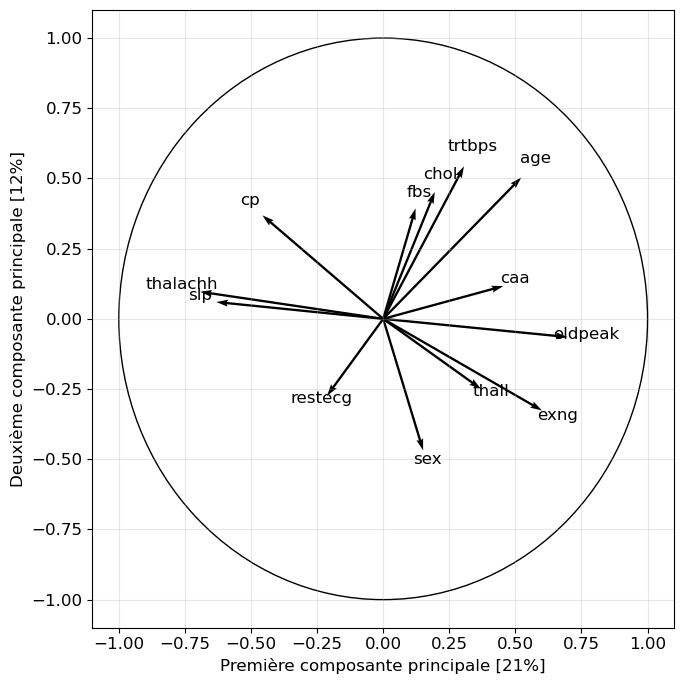

In [7]:
#Coordonnées des variables sur le premier cercle des corrélations 
coord_corr_1 = np.corrcoef(np.array(data),cp[:,0],rowvar=False)[:,-1][:-1]
coord_corr_2 = np.corrcoef(np.array(data),cp[:,1],rowvar=False)[:,-1][:-1]

#Plot sur le premier cercle des corrélations
fig, ax = plt.subplots(figsize=(7,7))
origin = np.array([np.zeros_like(coord_corr_1),np.zeros_like(coord_corr_2)])
ax.quiver(*origin, coord_corr_1, coord_corr_2, angles='xy', scale_units='xy', scale=1, width=0.004)

#Plot du cercle
ax.add_patch(plt.Circle((0,0),1, color='black', fill=False))

#Ajout des noms
for i, var in enumerate(pca.feature_names_in_):
    plt.text(coord_corr_1[i]*1.1, coord_corr_2[i]*1.1, var, ha='center')
#ax.set_title("Premier cercle des corrélations")
ax.set_xlabel(fr'Première composante principale [{pca.explained_variance_ratio_[0]:.0%}]')
ax.set_ylabel(fr'Deuxième composante principale [{pca.explained_variance_ratio_[1]:.0%}]')
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-1.1,1.1])
ax.grid(alpha=0.3)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/CercleCorrélation")
plt.show()

### AFD

#### • Appliquer une AFD linéaire aux mêmes données, en utilisant output come variable de référence

Combien d’axes factoriels obtient-on ? Pourquoi ?

On a un seul axe factoriel car on a que $2$ classes.

#### • Tracer un graphe de la distribution des projections sur le(s) axe(s) factoriel(s)

A-t-on une bonne séparation des deux classes ?

D'après le graphe, on a une quantité non négligeable de distribution qui se superposent donc la séparation n'est pas optimale.

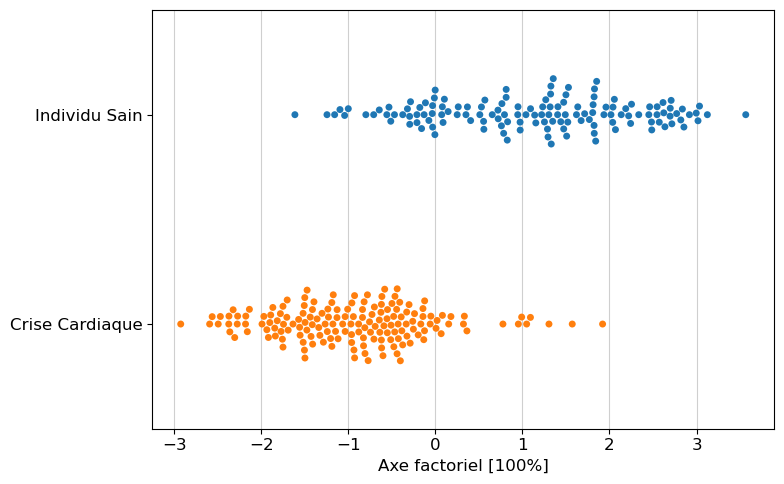

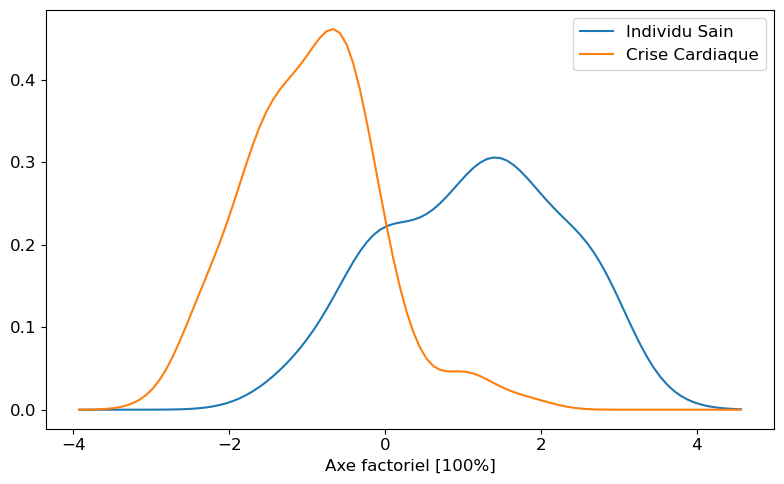

In [8]:
#AFD
lda = LinearDiscriminantAnalysis(tol=0.000001)
fd = lda.fit_transform(data,output)


#Manipulation des données pour plot
df1 = pd.DataFrame(fd[output==0],columns=['v'])
df2 = pd.DataFrame(fd[output==1],columns=['v'])
df3 = pd.concat([df1,df2], axis=1, keys=['Individu Sain','Crise Cardiaque']).stack(0)
df3 = df3.reset_index(level=1)
#Swarmplot des individus projétés sur la première composante principale
sb.swarmplot(x='v', y='level_1', data=df3, orient='h')
plt.grid(True,alpha = 0.6,axis='x')
#plt.title("Swarmplot des individus projetés sur la première composante principale")
plt.xlabel(fr'Axe factoriel [{lda.explained_variance_ratio_[0]:.0%}]')
plt.ylabel('')
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/DistribAxeFactSwarplot")
plt.show()


#Transformation des données pour les représentés sous forme de densité
f0 = gaussian_kde(fd[output == 0, 0])
f1 = gaussian_kde(fd[output == 1, 0])
x = np.linspace(fd.min() - 1, fd.max() + 1, 100)

#Plot de la distribution des projections sur l'axe factoriel
plt.plot(x, f0(x), label='Individu Sain')
plt.plot(x, f1(x), label='Crise Cardiaque')
#plt.title("Graphe de la distribution des projections sur l'axe factoriel")
plt.xlabel(fr'Axe factoriel [{lda.explained_variance_ratio_[0]:.0%}]')
plt.legend()
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/DistribAxeFact")
plt.show()

#### • Calculer l’*accuracy* de cette méthode de classification et la matrice de confusion

Est-ce satisfaisant ?

Comme on veut prédire les individus qui font une crise cardiaque, $84.2\%$ n'est pas une précision assez satisfaisante.

Si on devait l’utiliser dans la pratique pour prédire si un patient aux urgences est malade, comment pourrait-on le modifier pour réduire le risque pour les patients ?

On peut modifier la frontière de décision pour prédire plus d'individu "crise cardiaque" quitte à avoir plus d'individu sain  prédit en "crise cardiaque".

Notre *accuracy* sera moins bonne mais les prédictions sur la classe "crise cardiaque" seront meilleures.

In [9]:
#Fonction pour afficher la matrice de confusion
def AffichageMatriceDeConfusion(o,p):
    plt.rc('font', size=30) #controls default text size
    plt.rc('axes', titlesize=12) #fontsize of the title
    plt.rc('axes', labelsize=12) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
    plt.rc('legend', fontsize=10) #fontsize of the legend
    ConfusionMatrixDisplay(confusion_matrix(o, p,normalize='true'),
                           display_labels=['Individu Sain','Crise Cardiaque']).plot(colorbar=False,cmap='PuBu')
    #plt.title("Matrice de confusion")
    plt.xlabel('Prédictions')
    plt.ylabel('Réalité')
    plt.tight_layout()
    plt.rc('font', size=12) #reset everything to 12 
    #plt.show()

Accuracy de l'AFD : 84.2%


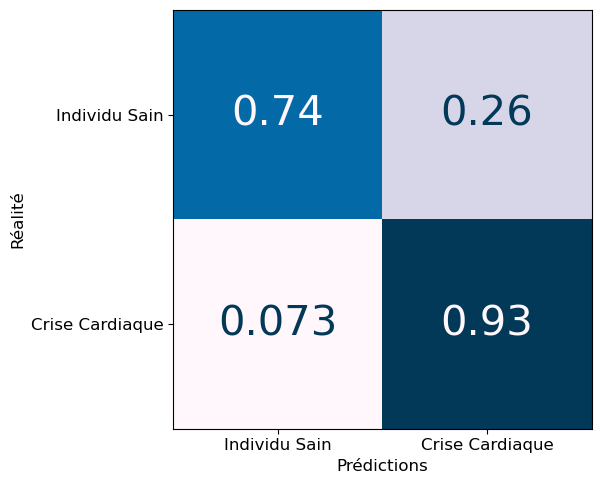

In [10]:
#Prédiction et Accuracy
prediction = lda.predict(data)
print(f"Accuracy de l'AFD : {(output == prediction).mean():.1%}")

#Matrice de confusion
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfAFD")
plt.show()

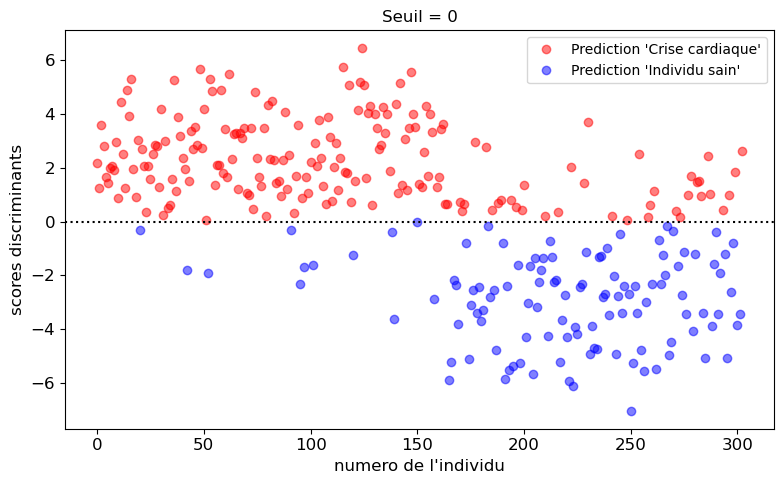

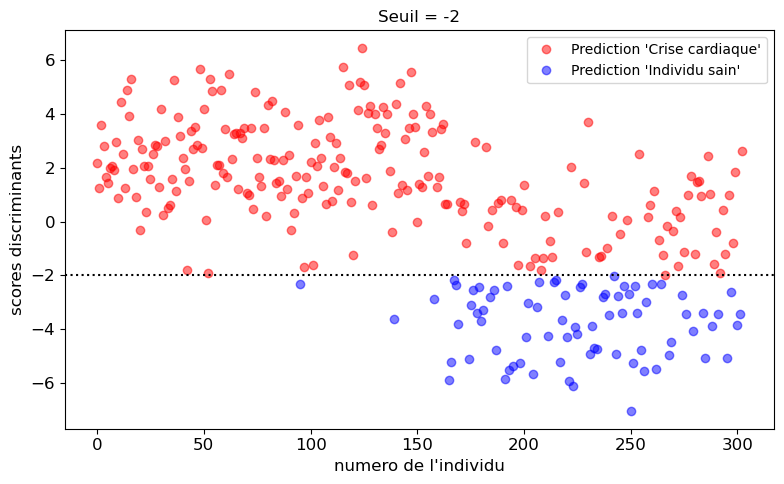

Accuracy de l'AFD : 77.9%


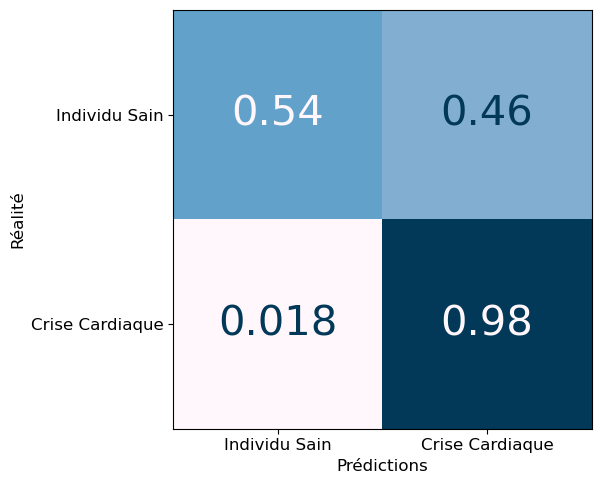

In [11]:
#Prédiction avec frontiere modifié et Accuracy
des_func = lda.decision_function(data)

def graph_frontiere(threshold):
    fig,ax = plt.subplots()
    sup = [i for i, val in enumerate(des_func) if val>threshold]
    ax.plot(sup, des_func[sup], 
            linestyle='none', color='r', marker='o',alpha=0.5)
    inf = [i for i, val in enumerate(des_func) if val<threshold]
    ax.plot(inf, des_func[inf], 
            linestyle='none', color='b', marker='o',alpha=0.5)
    plt.title('Seuil = {}'.format(threshold))
    plt.legend(["Prediction 'Crise cardiaque'","Prediction 'Individu sain'"])
    ax.axhline(y=threshold, color='black', linestyle=':')
    plt.xlabel(xlabel="numero de l'individu")
    plt.ylabel(ylabel="scores discriminants")
    plt.tight_layout()
    if SAVE_FIGURE : plt.savefig("Projet/Graphfrontiere{}".format(threshold))
    plt.show()

frontiere = -2

graph_frontiere(0)
graph_frontiere(frontiere)

prediction = np.zeros_like(des_func)
for i in range(len(des_func)):
    if des_func[i] > frontiere:
        prediction[i] = 1

print(f"Accuracy de l'AFD : {(output == prediction).mean():.1%}")
    
#Matrice de confusion
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfAFDmod")
plt.show()

### SVM
#### • Entraîner une SVM linéaire pour séparer les deux classes, en utilisant toutes les données

#### • Calculer l’*accuracy* et la matrice de confusion

Est-ce meilleur que l’AFD?

L'AFD nous a donné une *accuracy* de $84.2\%$ et le SVM linéaire nous donne $85.5\%$ donc c'est légèrement mieux.

Accuracy du SVM : 85.5%


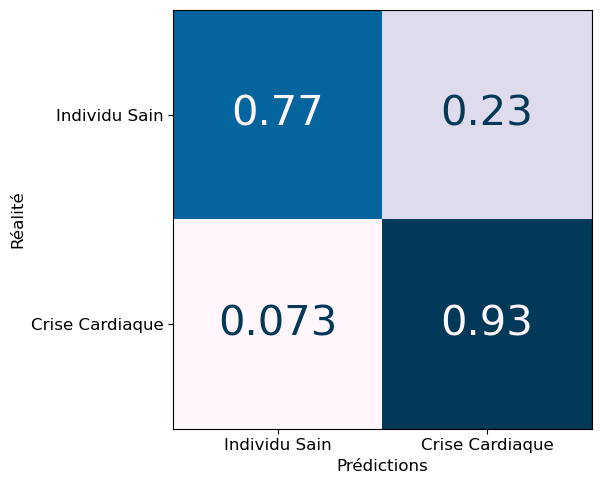

In [24]:
#SVM
clf = svm.SVC(kernel='linear', C=1)
clf.fit(data,output)

#Prédiction et Accuracy
prediction = clf.predict(data)
print(f"Accuracy du SVM : {(output == prediction).mean():.1%}")

#Matrice de confusion
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfSVMLin")
plt.show()

#### • Répéter l’entraînement en n’utilisant que les deux premières composantes principales

Comment change l’accuracy ?

L'*accuracy* est plus faible par rapport au cas avec toutes les composantes. 

#### • Tracer la droite de séparation qu’on obtient ainsi dans le plot sur les deux composantes principales

Accuracy du SVM : 82.2%


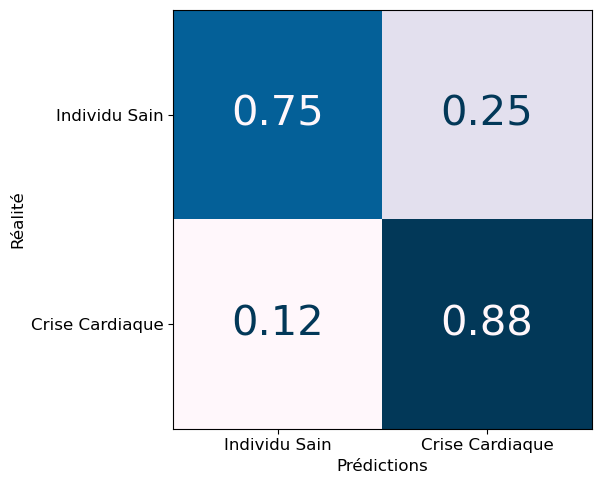

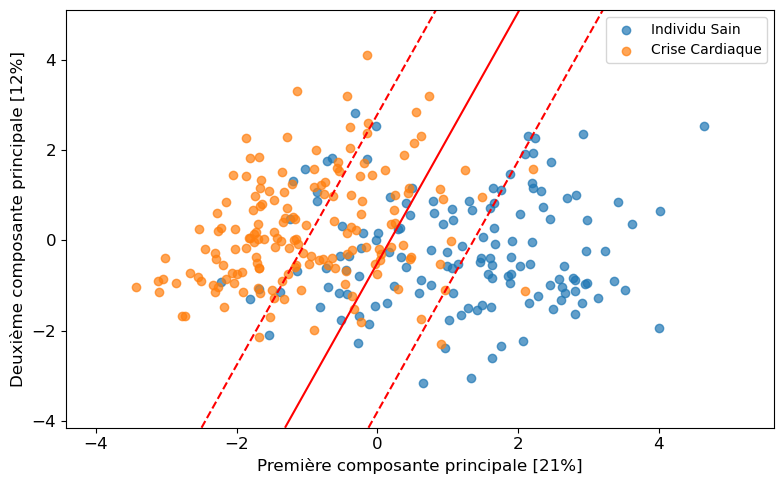

In [25]:
#SVM
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(cp[:,[0,1]],output)

#Prédiction et Accuracy
prediction = clf.predict(cp[:,[0,1]])
print(f"Accuracy du SVM : {(output == prediction).mean():.1%}")

#Matrice de confusion
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfSVMLin2comp")
plt.show()

#Plot Nuage des individus projétés sur les 2 premières composantes principales
plt.scatter(cp[output == 0, 0], cp[output == 0, 1], alpha=0.7, label = 'Individu Sain')
plt.scatter(cp[output == 1, 0], cp[output == 1, 1], alpha=0.7, label = 'Crise Cardiaque')

#Plot de la droite de séparation
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf, cp[:,[0,1]], plot_method="contour", levels=[-1, 0, 1], colors='r',ax=ax,
                                       grid_resolution=1000, linestyles=["--", "-", "--"])
plt.legend()
#plt.title("Nuage des individus projetés sur les 2 premières composantes principales avec droite de séparation du SVM")
plt.xlabel(fr'Première composante principale [{pca.explained_variance_ratio_[0]:.0%}]')
plt.ylabel(fr'Deuxième composante principale [{pca.explained_variance_ratio_[1]:.0%}]')
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/NuageSVMLin2comp")
plt.show()

#### • Répéter l’entraînement en utilisant, cette fois, une SVM non-linéaire (par exemple, noyau“rbf”) sur toutes les données

Est-ce meilleur ?

On a une *accuracy* de $92.1\%$, c'est-à-dire meilleur que le SVM linéaire.

Accuracy du SVM : 92.1%


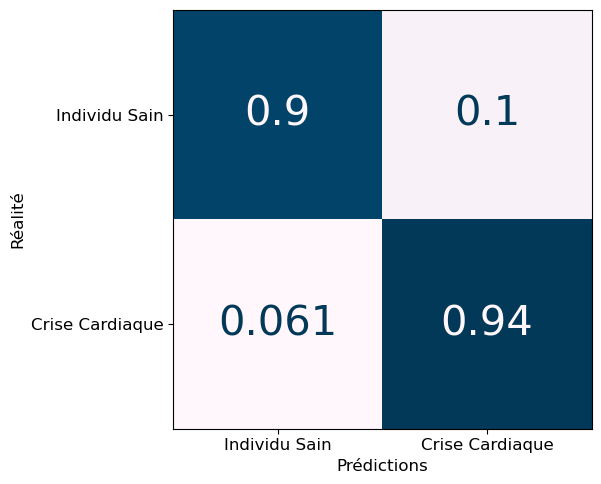

In [26]:
#SVM
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(data,output)

#Prédiction et Accuracy
prediction = clf.predict(data)
print(f"Accuracy du SVM : {(output == prediction).mean():.1%}")

#Matrice de confusion
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfSVMrbf")
plt.show()

Accuracy du SVM : 81.5%


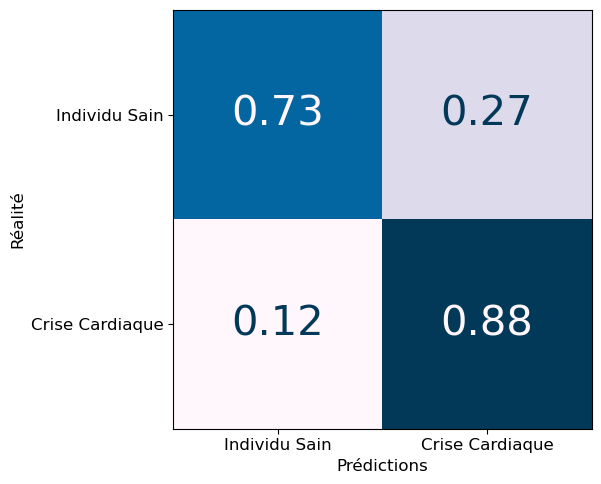

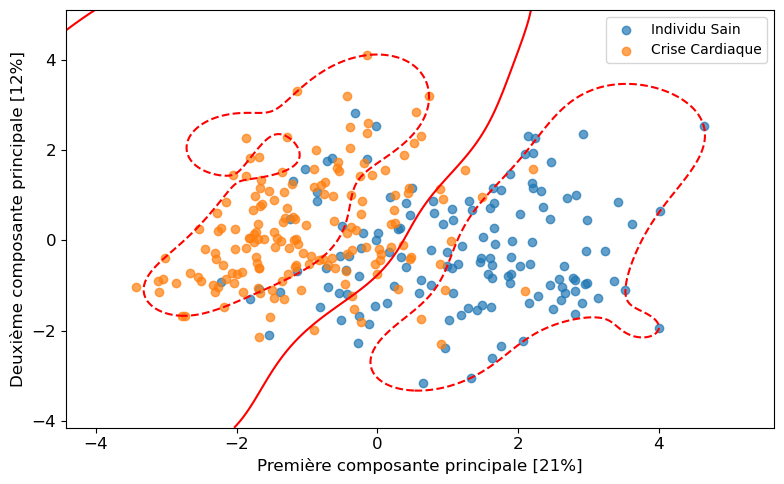

In [27]:
#SVM
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(cp[:,[0,1]],output)

#Prédiction et Accuracy
prediction = clf.predict(cp[:,[0,1]])
print(f"Accuracy du SVM : {(output == prediction).mean():.1%}")

#Matrice de confusion
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfSVMrbf2comp")
plt.show()

#Plot Nuage des individus projétés sur les 2 premières composantes principales
plt.scatter(cp[output == 0, 0], cp[output == 0, 1], alpha=0.7, label = 'Individu Sain')
plt.scatter(cp[output == 1, 0], cp[output == 1, 1], alpha=0.7, label = 'Crise Cardiaque')

#Plot de la droite de séparation
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf, cp[:,[0,1]], plot_method="contour", levels=[-1, 0, 1], colors='r',ax=ax,
                                       grid_resolution=1000, linestyles=["--", "-", "--"])
plt.legend()
#plt.title("Nuage des individus projetés sur les 2 premières composantes principales avec droite de séparation du SVM")
plt.xlabel(fr'Première composante principale [{pca.explained_variance_ratio_[0]:.0%}]')
plt.ylabel(fr'Deuxième composante principale [{pca.explained_variance_ratio_[1]:.0%}]')
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/NuageSVMrbf2comp")
plt.show()

### Réseaux de neurones
#### • Entraîner un réseau de neurones avec les paramètres standards

Peut-on dire si c’est mieux des méthodes ci-dessus ?

On ne peut pas réellement dire si cette méthode est meilleur car on entraine le réseau de neurones sur toute les données, mais les réseaux de neurones ont un risque d'overfit.
Donc si on utilise ce réseau de neurones sur de nouvelles données, on pourrait avoir des performances bien inférieurs aux autres méthodes.

C:\Users\famil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy du réseaux de neurones : 93.4%


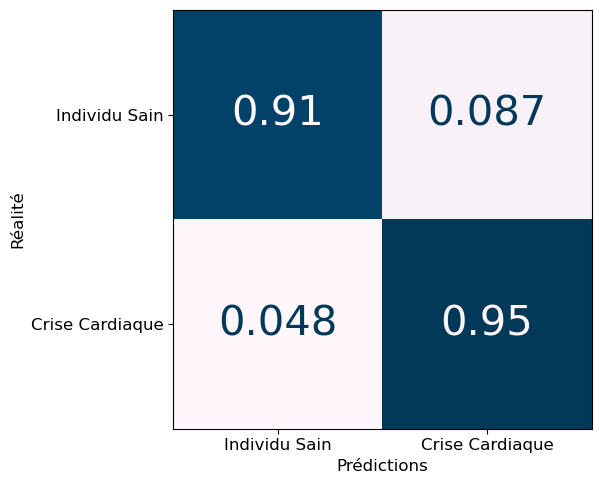

In [28]:
#Réseaux de neurones
rdn = MLPClassifier()
rdn.fit(data,output)

#Prédiction et Accuracy
prediction = rdn.predict(data)
print(f"Accuracy du réseaux de neurones : {(output == prediction).mean():.1%}")
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfRDN")
plt.show()

#### • Répéter l’entraînement avec beaucoup plus de neurones

Comment change le résultat ?

On a une meilleure *accuracy* a tel point qu'on peut atteindre les $100\%$ mais on a toujours le risque d'overfit.

Accuracy du réseaux de neurones (20 neuronnes) : 100.0%


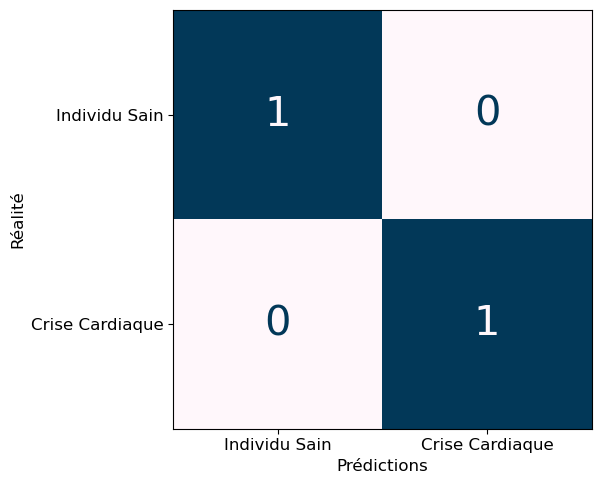

In [29]:
#Réseaux de neurones
rdn = MLPClassifier(hidden_layer_sizes=[100]*20, max_iter=200)
rdn.fit(data,output)

#Prédiction et Accuracy
prediction = rdn.predict(data)
print(f"Accuracy du réseaux de neurones (20 neuronnes) : {(output == prediction).mean():.1%}")
AffichageMatriceDeConfusion(output,prediction)
plt.tight_layout()
if SAVE_FIGURE : plt.savefig("Projet/MatConfRDN20")
plt.show()

**• Séparer le jeu de données en 80% d’entraînement et 20% de test. Répéter l’entraînement
de AFD, SVM (linéaire et non) et les deux réseaux de neurones, en n’entraînant que sur le
premier 80% et évaluant sur le reste.**

Comment changent les résultats ?

On a des résultats d'*accuracy* relativement identique pour l'AFD et les SVM mais, comme on pouvait s'y attendre, on a des valeurs d'*accuracy* plus faible pour les réseaux de neuronnes car on évalue sur des données qui n'ont pas été vu lors de l'entrainement.

In [17]:
#Separation
data_train,data_test,output_train,output_test = train_test_split(data,output,train_size=0.8,random_state=42)

In [22]:
def entraine_et_evalue(estimateur, tr=data_train, out_tr=output_train, test=data_test, out_test=output_test):
    estimateur.fit(tr, out_tr)
    predictions = estimateur.predict(test)
    print(f'Accuracy : {(out_test == predictions).mean():.1%}')
    print(f'Précision sur "Crise Cardiaque" : {(out_test[out_test == 1] == predictions[out_test == 1]).mean():.1%}\n')

In [31]:
import warnings
warnings.filterwarnings("ignore")

print("AFD")
lda = LinearDiscriminantAnalysis()
entraine_et_evalue(lda)

print("SVM Linéaire")
clf = svm.SVC(kernel='linear', C=0.1)
entraine_et_evalue(clf)

print("SVM Non-Linéaire (rbf)")
clf = svm.SVC(kernel='rbf', C=0.1)
entraine_et_evalue(clf)

print("Réseau de neurones avec les paramètres standards")
rdn = MLPClassifier()
entraine_et_evalue(rdn)

print("Réseau de neurones avec 20 neurones")
rdn = MLPClassifier(hidden_layer_sizes=[100]*20)
entraine_et_evalue(rdn)

AFD
Accuracy : 86.9%
Précision sur "Crise Cardiaque" : 87.5%

SVM Linéaire
Accuracy : 88.5%
Précision sur "Crise Cardiaque" : 90.6%

SVM Non-Linéaire (rbf)
Accuracy : 88.5%
Précision sur "Crise Cardiaque" : 90.6%

Réseau de neurones avec les paramètres standards
Accuracy : 85.2%
Précision sur "Crise Cardiaque" : 84.4%

Réseau de neurones avec 20 neurones
Accuracy : 86.9%
Précision sur "Crise Cardiaque" : 81.2%

